In [645]:
import pandas as pd
import numpy as np
import re
import pymysql as mysql
import sqlalchemy

In [646]:
"""
link = 'https://www.kaggle.com/teajay/global-shark-attacks/#attacks.csv'

data = pd.read_csv(link)
data.info()
"""
"""
cnx = sqlalchemy.create_engine('mysql+pymysql://www.kaggle.com/teajay/global-shark-attacks/#attacks.csv')
country = pd.read_sql_query('SELECT Country FROM attacks', cnx)
"""
#data = pd.read_csv("attacks.csv", encoding = "ISO-8859-1")
#data = pd.read_csv("attacks.csv", encoding = "UTF-16")
#data = pd.read_csv("attacks.csv", encoding = "ISO-8859")
#data = pd.read_csv("attacks.csv", encoding = "latin1")
data = pd.read_csv('C:/Users/celia/Documents/Ironhack/Ironhack_Week2/dataton_sharkattack/attacks.csv', encoding="ISO-8859-1")

In [647]:
data

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [648]:
data.isnull().sum()

Case Number               17021
Date                      19421
Year                      19423
Type                      19425
Country                   19471
Area                      19876
Location                  19961
Activity                  19965
Name                      19631
Sex                       19986
Age                       22252
Injury                    19449
Fatal (Y/N)               19960
Time                      22775
Species                   22259
Investigator or Source    19438
pdf                       19421
href formula              19422
href                      19421
Case Number.1             19421
Case Number.2             19421
original order            19414
Unnamed: 22               25722
Unnamed: 23               25721
dtype: int64

In [649]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
Case Number               8702 non-null object
Date                      6302 non-null object
Year                      6300 non-null float64
Type                      6298 non-null object
Country                   6252 non-null object
Area                      5847 non-null object
Location                  5762 non-null object
Activity                  5758 non-null object
Name                      6092 non-null object
Sex                       5737 non-null object
Age                       3471 non-null object
Injury                    6274 non-null object
Fatal (Y/N)               5763 non-null object
Time                      2948 non-null object
Species                   3464 non-null object
Investigator or Source    6285 non-null object
pdf                       6302 non-null object
href formula              6301 non-null object
href                      6302 non-null obje

In [650]:
data.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [651]:
data['Unnamed: 22']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
25718    NaN
25719    NaN
25720    NaN
25721    NaN
25722    NaN
Name: Unnamed: 22, Length: 25723, dtype: object

In [652]:
data.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [653]:
data_modified = data[['Case Number','Year','Type','Country','Area','Location','Sex ','Age','Fatal (Y/N)', 'Time', 'Species ']]

In [654]:
data_modified

,Case Number,Year,Type,Country,Area,Location,Sex,Age,Fatal (Y/N),Time,Species
0,2018.06.25,2018.0,Boating,USA,California,"Oceanside, San Diego County",F,57,N,18h00,White shark
1,2018.06.18,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",F,11,N,14h00 -15h00,NaN
2,2018.06.09,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",M,48,N,07h45,NaN
3,2018.06.08,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,M,NaN,N,NaN,2 m shark
4,2018.06.04,2018.0,Provoked,MEXICO,Colima,La Ticla,M,NaN,N,NaN,"Tiger shark, 3m"
...,...,...,...,...,...,...,...,...,...,...,...
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [655]:
data_modified.isnull().sum()

Case Number    17021
Year           19423
Type           19425
Country        19471
Area           19876
Location       19961
Sex            19986
Age            22252
Fatal (Y/N)    19960
Time           22775
Species        22259
dtype: int64

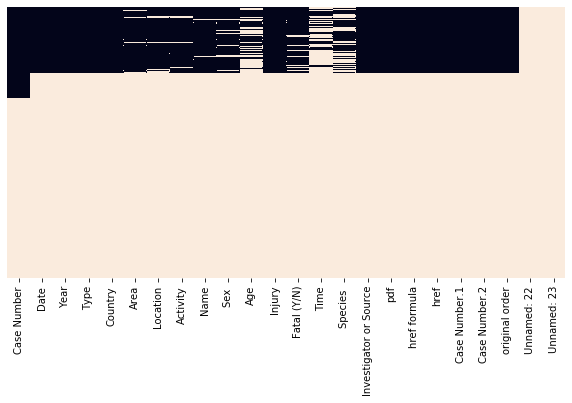

In [656]:
# o número de células com valores NaN é muito grande
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,5))
sns.heatmap(data.isnull(), cbar=False, yticklabels=False)

In [657]:
data_modified.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 11 columns):
Case Number    8702 non-null object
Year           6300 non-null float64
Type           6298 non-null object
Country        6252 non-null object
Area           5847 non-null object
Location       5762 non-null object
Sex            5737 non-null object
Age            3471 non-null object
Fatal (Y/N)    5763 non-null object
Time           2948 non-null object
Species        3464 non-null object
dtypes: float64(1), object(10)
memory usage: 2.2+ MB


In [658]:
# Entendemos que o campo país é muito importante, para sabermos o local do ataque dos tubarões
# por isso, deletamos todas as linhas do dataset, cujo campo de país é NaN
data_modified.dropna(subset =['Country'], inplace=True)
data_modified.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6252 entries, 0 to 6301
Data columns (total 11 columns):
Case Number    6251 non-null object
Year           6250 non-null float64
Type           6248 non-null object
Country        6252 non-null object
Area           5832 non-null object
Location       5751 non-null object
Sex            5691 non-null object
Age            3462 non-null object
Fatal (Y/N)    5718 non-null object
Time           2941 non-null object
Species        3452 non-null object
dtypes: float64(1), object(10)
memory usage: 586.1+ KB


C:\Users\celia\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [659]:
country = list(data_modified['Country'])

In [660]:
# Criando dicionário para verificar o numero de vezes que os países aparecem no dataset
from operator import itemgetter
dicionario = {}
for t in country:
    dicionario[t] = country.count(t)
    
#print(dicionario)
dict_ordenado = sorted(dicionario.items(), key=itemgetter(1))
print(dict_ordenado)

[('MALDIVES', 1), ('COMOROS', 1), ('ARUBA', 1), ('PUERTO RICO', 1), ('ST. MARTIN', 1), ('DIEGO GARCIA', 1), ('PALESTINIAN TERRITORIES', 1), ('NEVIS', 1), ('BRITISH VIRGIN ISLANDS', 1), ('GULF OF ADEN', 1), ('Sierra Leone', 1), ('ST. MAARTIN', 1), ('GRAND CAYMAN', 1), ('Seychelles', 1), ('MEXICO ', 1), ('EGYPT / ISRAEL', 1), ('NORTHERN ARABIAN SEA', 1), ('ANGOLA', 1), ('SOUTH CHINA SEA', 1), ('BANGLADESH', 1), ('WESTERN SAMOA', 1), ('BRITISH ISLES', 1), ('RED SEA', 1), ('FEDERATED STATES OF MICRONESIA', 1), ('ADMIRALTY ISLANDS', 1), ('BRITISH WEST INDIES', 1), ('RED SEA / INDIAN OCEAN', 1), ('NORTH SEA', 1), ('NICARAGUA ', 1), ('MALDIVE ISLANDS', 1), ('ANDAMAN / NICOBAR ISLANDAS', 1), ('GABON', 1), ('MAYOTTE', 1), ('NORTH ATLANTIC OCEAN ', 1), ('THE BALKANS', 1), ('SUDAN?', 1), ('ARGENTINA', 1), ('GUATEMALA', 1), ('NETHERLANDS ANTILLES', 1), ('NORTHERN MARIANA ISLANDS', 1), ('IRAN / IRAQ', 1), ('JAVA', 1), (' PHILIPPINES', 1), ('SOLOMON ISLANDS / VANUATU', 1), ('BAY OF BENGAL', 1), ('MI

In [662]:
data_modified 
    

,Case Number,Year,Type,Country,Area,Location,Sex,Age,Fatal (Y/N),Time,Species
0,2018.06.25,2018.0,Boating,USA,California,"Oceanside, San Diego County",F,57,N,18h00,White shark
1,2018.06.18,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",F,11,N,14h00 -15h00,NaN
2,2018.06.09,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",M,48,N,07h45,NaN
3,2018.06.08,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,M,NaN,N,NaN,2 m shark
4,2018.06.04,2018.0,Provoked,MEXICO,Colima,La Ticla,M,NaN,N,NaN,"Tiger shark, 3m"
...,...,...,...,...,...,...,...,...,...,...,...
6297,ND.0005,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,M,NaN,Y,NaN,NaN
6298,ND.0004,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,M,NaN,Y,NaN,NaN
6299,ND.0003,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,M,NaN,Y,NaN,NaN
6300,ND.0002,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",M,NaN,Y,NaN,NaN


In [663]:
#regex para eliminar o "?"
data_modified['Country'].replace( { r"[?]+" : '' }, inplace= True, regex = True) 
#coloar em letra minúscula
data_modified['Country'] = [str(i).lower() for i in data_modified['Country']]

C:\Users\celia\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [664]:
data_modified

,Case Number,Year,Type,Country,Area,Location,Sex,Age,Fatal (Y/N),Time,Species
0,2018.06.25,2018.0,Boating,usa,California,"Oceanside, San Diego County",F,57,N,18h00,White shark
1,2018.06.18,2018.0,Unprovoked,usa,Georgia,"St. Simon Island, Glynn County",F,11,N,14h00 -15h00,NaN
2,2018.06.09,2018.0,Invalid,usa,Hawaii,"Habush, Oahu",M,48,N,07h45,NaN
3,2018.06.08,2018.0,Unprovoked,australia,New South Wales,Arrawarra Headland,M,NaN,N,NaN,2 m shark
4,2018.06.04,2018.0,Provoked,mexico,Colima,La Ticla,M,NaN,N,NaN,"Tiger shark, 3m"
...,...,...,...,...,...,...,...,...,...,...,...
6297,ND.0005,0.0,Unprovoked,australia,Western Australia,Roebuck Bay,M,NaN,Y,NaN,NaN
6298,ND.0004,0.0,Unprovoked,australia,Western Australia,NaN,M,NaN,Y,NaN,NaN
6299,ND.0003,0.0,Unprovoked,usa,North Carolina,Ocracoke Inlet,M,NaN,Y,NaN,NaN
6300,ND.0002,0.0,Unprovoked,panama,NaN,"Panama Bay 8ºN, 79ºW",M,NaN,Y,NaN,NaN


In [665]:
# mantendo somente dados 'F' e 'M', o 'M ' soma em 'M' e é eliminado, os demais transformar em 'Unknown'
data_modified["Sex "].replace("N", "Unknown", inplace=True) 
data_modified["Sex "].replace(".", "Unknown", inplace=True)
data_modified["Sex "].replace("M ", "Unknown", inplace=True)
data_modified["Sex "].replace("lli", "Unknown", inplace=True)

In [666]:
print(data_modified["Sex "].value_counts())

M          5052
F           634
Unknown       5
Name: Sex , dtype: int64


In [667]:
# Limpando a coluna Fatal (Y/N)
# Consideramos os valores abaixo como Unknown, ou seja, motivo do ataque do tubarão é desconhecido, pois parece lixo
data_modified["Fatal (Y/N)"].replace(" N", "Unknown", inplace=True) 
data_modified["Fatal (Y/N)"].replace("N ", "Unknown", inplace=True)
data_modified["Fatal (Y/N)"].replace("UNKNOWN", "Unknown", inplace=True)
data_modified["Fatal (Y/N)"].replace("2017", "Unknown", inplace=True)
data_modified["Fatal (Y/N)"].replace("y", "Unknown", inplace=True)
data_modified["Fatal (Y/N)"].replace("M", "Unknown", inplace=True)

In [668]:
# com todos os valores considerados lixo redefinidos como unknown, fica mais fácil a visualização e categorização
data_modified["Fatal (Y/N)"].value_counts()

N          4274
Y          1364
Unknown      80
Name: Fatal (Y/N), dtype: int64

In [669]:
# alterando todos os preenchimentos NaN para 'Unknown', pois são elementos desconhecidos
data_modified['Species '] = data_modified['Species '].fillna(value='Unknown')
data_modified['Case Number'] = data_modified['Case Number'].fillna(value='Unknown')
data_modified['Year'] = data_modified['Year'].fillna(value='Unknown')
data_modified['Type'] = data_modified['Type'].fillna(value='Unknown')
data_modified['Country'] = data_modified['Country'].fillna(value='Unknown')
data_modified['Area'] = data_modified['Area'].fillna(value='Unknown')
data_modified['Location'] = data_modified['Location'].fillna(value='Unknown')
data_modified['Age'] = data_modified['Age'].fillna(value='Unknown')
data_modified['Time'] = data_modified['Time'].fillna(value='Unknown')

C:\Users\celia\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\celia\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\celia\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

In [674]:
data_modified

,Case Number,Year,Type,Country,Area,Location,Sex,Age,Fatal (Y/N),Time,Species
0,2018.06.25,2018,Other,usa,California,"Oceanside, San Diego County",F,57,N,18h00,White shark
1,2018.06.18,2018,Unprovoked,usa,Georgia,"St. Simon Island, Glynn County",F,11,N,14h00 -15h00,Unknown
2,2018.06.09,2018,Other,usa,Hawaii,"Habush, Oahu",M,48,N,07h45,Unknown
3,2018.06.08,2018,Unprovoked,australia,New South Wales,Arrawarra Headland,M,Unknown,N,Unknown,2 m shark
4,2018.06.04,2018,Provoked,mexico,Colima,La Ticla,M,Unknown,N,Unknown,"Tiger shark, 3m"
...,...,...,...,...,...,...,...,...,...,...,...
6297,ND.0005,0,Unprovoked,australia,Western Australia,Roebuck Bay,M,Unknown,Y,Unknown,Unknown
6298,ND.0004,0,Unprovoked,australia,Western Australia,Unknown,M,Unknown,Y,Unknown,Unknown
6299,ND.0003,0,Unprovoked,usa,North Carolina,Ocracoke Inlet,M,Unknown,Y,Unknown,Unknown
6300,ND.0002,0,Unprovoked,panama,Unknown,"Panama Bay 8ºN, 79ºW",M,Unknown,Y,Unknown,Unknown


In [675]:
data_modified["Type"].replace("Invalid", "Other", inplace=True)
data_modified["Type"].replace("Sea Disaster", "Other", inplace=True)
data_modified["Type"].replace("Boating", "Other", inplace=True)
data_modified["Type"].replace("Boat", "Other", inplace=True)
data_modified["Type"].replace("Questionable", "Other", inplace=True)
data_modified["Type"].replace("Boatomg", "Other", inplace=True)
data_modified["Type"].value_counts()

Unprovoked    4562
Other         1115
Provoked       571
Unknown          4
Name: Type, dtype: int64

In [676]:
lista = []
lista = list(data_modified['Time'])
print(len(lista))
print(len(set(lista)))
print(set(lista))

6252
366
{'03h00', '14h40', '12h00 to 14h00', '17h15', '12h45 / 13h45', '13h345', '14h16', 'Late morning', '12h48', '23h30', '08h57', 'night', '10h44', '\xa0 ', '15h00', '15h06', 'Afternoon', '10h00', '05h40', '13h40', 'Prior to 10h37', '08h15', '15h49', '16h10', '22h30', 'X', '02h00', '07h10', 'After noon', '16h40', '11h05', '09h57', 'Just before dawn', '09h20', '13h50', '11h40', '12h05', '2 hours after Opperman', 'After 04h00', '08h00 / 09h30', '06h15', '17h58', '10h20', '01h00', '10h07', '17h46', '12h45', '15h20', '"Night"', 'Shortly before 13h00', '17h34', '08h20', '13h42', 'Midday.', '08h10', '16h14', '18h50', '13h53', '17h50', '15h15', '15h00 or 15h45', '--', 'Daybreak', '14h10', '14h20', '19h00, Dusk', '07h30', '09h45', '16h45', '13h45', 'Sometime between 06h00 & 08hoo', 'Dark', '18h45', '10h00 -- 11h00', 'Mid afternoon', '15h05', '18h25', 'Shortly after midnight', '>17h00', '09h00 -10h00', '13h06', '19h55', '11h51', 'Possibly same incident as 2000.08.21', '16h30', '11h10', '17h

In [677]:
manha = list('00 01 02 03 04 05 06 07 08 09 10 11'.split())
tarde = list('12 13 14 15 16 17'.split())
noite = list('18 19 20 21 22 23'.split())
"""
def trata_hora(string):
    if 'h' in string:
        hora, minuto = string.split('h')
        if hora in manha:
            return 'Manha'
        elif hora in tarde:
            return 'Tarde'
        elif hora in noite:
            return 'Noite'
        else:
            return 'Unknown'
"""
def coloca_ponto(string):
    if len(string) == 4:
        return re.sub('([0-9]{2}[0-9]{2})', string[0]+string[1]+'h'+string[2]+string[3], string)
    else:
        return string
def limpa_espaco_barra(string):
    if ' / ' in string:
        return re.sub('[0-9][0-9]h[0-9][0-9] / [0-9][0-9]h[0-9][0-9]',(string.split(' / '))[0], string)
def nao_h(string):
    if 'h' not in string:
        return re.sub('[0-9][0-9](^h)[0-9][0-9]','h', string)
def manha(string):
    return re.sub('(0[0-9]h[0-9]{2})', 'Manha', string)
def manha2(string):
    return re.sub('(1[01]h\d\d)', 'Manha', string)
def manha3(string):
    return re.sub('([0-9]h[0-9]{2})', 'Manha', string)
def tarde(string):
    return re.sub('(1[234567]h\d\d)', 'Tarde', string)
def noite(string):
    return re.sub('(1[89]h\d\d)', 'Noite', string)
def noite2(string):
    return re.sub('(2[0123]h\d\d)', 'Noite', string)

#lista_periodo = []
#for l in lista:
#    lista_periodo.append(trata_hora(l))


In [678]:
data_modified['Time'] = data_modified['Time'].apply(lambda x: coloca_ponto(x))
data_modified['Time'] = data_modified['Time'].apply(lambda x: manha(x))
data_modified['Time'] = data_modified['Time'].apply(lambda x: manha2(x))
data_modified['Time'] = data_modified['Time'].apply(lambda x: manha3(x))
data_modified['Time'].apply(lambda x: tarde(x))
data_modified['Time'].apply(lambda x: noite(x))
data_modified['Time'].apply(lambda x: noite2(x))

lista = list(data_modified['Time'])
print(lista)

['1Manha', '1Manha  -1Manha', 'Manha', 'Unknown', 'Unknown', 'Unknown', 'Late afternoon', 'Unknown', '1Manha', '1Manha', 'Morning', 'Unknown', '1Manha', 'Manha', 'Unknown', 'Manha', 'Manha', 'Unknown', 'Manha', '1Manha', 'Manha', 'Manha', 'Afternoon', '2Manha', 'Manha', 'Unknown', 'Unknown', 'Unknown', 'Unknown', 'Manha', 'Manha', 'Unknown', '1Manha', '1Manha', '1Manha', 'Manha', '1Manha', '1Manha', 'Manha', 'Unknown', '1Manha, Dusk', 'Night', '1Manha', '1Manha', 'Unknown', 'Unknown', 'Unknown', 'Manha', '1Manha', '1Manha', 'Unknown', 'Late afternoon', 'Unknown', '1Manha', '1Manha', 'Unknown', 'Unknown', 'Unknown', 'Unknown', 'Unknown', '1Manha', 'Late afternoon', '1Manha', '2Manha', 'Unknown', 'Manha', '1Manha', 'Afternoon', '1Manha', 'Manha', 'Afternoon', 'Manha', '1Manha', '1Manha', '1Manha', 'Unknown', 'Morning', '1Manha', '1Manha', '1Manha', 'Morning', 'Unknown', '1Manha', 'Afternoon', 'Night', 'Unknown', '1Manha', '1Manha', 'Manha', 'Unknown', 'Morning', 'Manha', 'Unknown', 'Unkn

C:\Users\celia\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\celia\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\celia\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

In [679]:
data_modified['Time'].value_counts()

Unknown                3311
1Manha                 1478
Manha                   787
Afternoon               186
Morning                 121
                       ... 
Prior to Manha            1
Just before sundown       1
Morning                   1
Late Afternoon            1
"Just before Manha"       1
Name: Time, Length: 107, dtype: int64

In [680]:
data_modified["Species "].replace( { r"[\d]*": '' }, inplace= True, regex = True) #tirando os números
data_modified["Species "].replace( { r"\d*m": '' }, inplace= True, regex = True) #tirando as unidades de metro
data_modified["Species "].replace( { r"\[(.*?)\]": '' }, inplace= True, regex = True) #tirando o que está entre colchetes
data_modified["Species "].replace( { r"[.,'']*": '' }, inplace= True, regex = True) #tirando pontuação e outros
data_modified["Species "].replace( { r"\d*kg": '' }, inplace= True, regex = True) #tirando unidades de kg
data_modified["Species "].replace( { r"\w*to\w*": '' }, inplace= True, regex = True) #tirando "to"
data_modified["Species "].replace( { r"\w*&\w*": '' }, inplace= True, regex = True) #tirando "$"
data_modified["Species "].replace( { r"\w*[?]\w*": '' }, inplace= True, regex = True) #tirando "?"
data_modified["Species "].replace( { r"\w*[<]\w*": '' }, inplace= True, regex = True) #tirando "<"
data_modified["Species "].replace( { r"\w*[>]\w*": '' }, inplace= True, regex = True) #tirando ">"
data_modified["Species "].replace( { r"\w*[+]\w*": '' }, inplace= True, regex = True) #tirando "+"
data_modified['Species '].value_counts()

Unknown                         2801
   shark                         313
 shark                           243
White shark                      163
  shark                          120
                                ... 
"whiptail shark" (thresher )       1
   - white shark                   1
White shark -lb feale              1
Galapagos                          1
 Galapagos shark                   1
Name: Species , Length: 892, dtype: int64

In [681]:
data_modified['Species '] = data_modified['Species '].apply(lambda x: x.strip())
data_modified['Species '].value_counts()

C:\Users\celia\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Unknown                                                                                2801
shark                                                                                   796
White shark                                                                             360
Tiger shark                                                                             205
white shark                                                                             145
                                                                                       ... 
reef shark - or a       grey-colored shark                                                1
White shark    fragent  recovered fro the hull                                            1
c   c  shark                                                                              1
White shark      -  identified by W C Shroeder based on  fragent ebedded in gunwale       1
Shark involveent not confired injury ay have been caused by a bluefish          

In [682]:
#salvando resultado da limpeza em attacks_updated.csv
data_modified.to_csv(r'C:/Users/celia/Documents/Ironhack/Ironhack_Week2/dataton_sharkattack/attacks_updated.csv',index=False,sep=',')